You are given a corpus dataset which contains news articles from BBC (Links to an external site.) on politics. Please read the data and then apply necessary techniques to print the following outcomes:

1.   Build a social graph out of those news articles
2.   Print the top 15 Entities based on degree centrality score
3.   Print the top 15 Entities based on Closeness centrality score


In [0]:
import nltk
import os

nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


True

Apply Preprocessor to process the text files

In [0]:
import os
import pickle

from nltk import pos_tag
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

class Preprocessor(object):
    """
    The preprocessor wraps a corpus object PlaintextCorpusReader and manages the stateful tokenization and part of 
    speech tagging into a directory that is stored in a format that can be read by the PickledCorpusReader.
    """

    def __init__(self, corpus, target=None, **kwargs):
        """
        The corpus is the PlaintextCorpusReader to preprocess and pickle.
        The target is the directory on disk to output the pickled corpus to.
        """
        self.corpus = corpus
        self.target = target

    def fileids(self, fileids=None, categories=None):
        """
        Helper function access the fileids of the corpus
        """
        if fileids:
            return fileids
        return self.corpus.fileids()

    def abspath(self, fileid):
        """
        Returns the absolute path to the target fileid from the corpus fileid.
        """
        # Find the directory, relative from the corpus root.
        parent = os.path.relpath(
            os.path.dirname(self.corpus.abspath(fileid)), self.corpus.root
        )

        # Compute the name parts to reconstruct
        basename  = os.path.basename(fileid)
        name, ext = os.path.splitext(basename)

        # Create the pickle file extension
        basename  = name + '.pickle'

        # Return the path to the file relative to the target.
        return os.path.normpath(os.path.join(self.target, parent, basename))

    def tagging(self, fileid):
        """
        Tags a document in the corpus. Tokenization done by PlaintextCorpusReader
        Returns a generator of paragraphs, which are lists of sentences,
        which in turn are lists of part of speech tagged words.
        """
        for paragraph in self.corpus.paras(fileids=fileid):
            yield [pos_tag(sent) for sent in paragraph]
            
    def process(self, fileid):
        """
        Writes the document as a pickle to the target location.
        This method is called multiple times from the transform runner.
        """
        
        # Compute the outpath to write the file to.
        target = self.abspath(fileid)
        parent = os.path.dirname(target)
        
        # Make sure the directory exists
        if not os.path.exists(parent):
            os.makedirs(parent)
        
        # Make sure that the parent is a directory and not a file
        if not os.path.isdir(parent):
            raise ValueError("Please supply a directory to write preprocessed data to.")
        
        # Create a data structure for the pickle
        document = list(self.tagging(fileid))
        
        # Open and serialize the pickle to disk
        with open(target, 'wb') as f:
            pickle.dump(document, f, pickle.HIGHEST_PROTOCOL)
        
        # Clean up the document
        del document
        
        # Return the target fileid
        return target

    def transform(self, fileids=None, categories=None):
        """
        Transform the wrapped corpus, writing out the segmented, tokenized,
        and part of speech tagged corpus as a pickle to the target directory.
        """

        # Make the target directory if it doesn't already exist
        if not os.path.exists(self.target):
            os.makedirs(self.target)
        
        # Resolve the fileids to start processing and return the list of 
        # target file ids to pass to downstream transformers. 
        return [
            self.process(fileid)
            for fileid in self.fileids(fileids, categories)
        ]

In [0]:
#Mount Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from nltk.corpus.reader.api import CorpusReader
from nltk.corpus.reader.api import CategorizedCorpusReader
from nltk import pos_tag
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk import pos_tag, sent_tokenize, wordpunct_tokenize
from nltk.tokenize import WordPunctTokenizer
import unicodedata
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.matutils import sparse2full
from gensim.corpora import Dictionary

In [0]:
# preprocessing text corpus to pickle corpus
text_corpus = PlaintextCorpusReader('/content/gdrive/My Drive/politics', '.*\.txt')

preprocessor = Preprocessor(text_corpus, target='/content/gdrive/My Drive/politics/Pickle')
preprocessor.transform()

['/content/gdrive/My Drive/politics/Pickle/001.pickle',
 '/content/gdrive/My Drive/politics/Pickle/002.pickle',
 '/content/gdrive/My Drive/politics/Pickle/003.pickle',
 '/content/gdrive/My Drive/politics/Pickle/004.pickle',
 '/content/gdrive/My Drive/politics/Pickle/005.pickle',
 '/content/gdrive/My Drive/politics/Pickle/006.pickle',
 '/content/gdrive/My Drive/politics/Pickle/007.pickle',
 '/content/gdrive/My Drive/politics/Pickle/008.pickle',
 '/content/gdrive/My Drive/politics/Pickle/009.pickle',
 '/content/gdrive/My Drive/politics/Pickle/010.pickle',
 '/content/gdrive/My Drive/politics/Pickle/011.pickle',
 '/content/gdrive/My Drive/politics/Pickle/012.pickle',
 '/content/gdrive/My Drive/politics/Pickle/013.pickle',
 '/content/gdrive/My Drive/politics/Pickle/014.pickle',
 '/content/gdrive/My Drive/politics/Pickle/015.pickle',
 '/content/gdrive/My Drive/politics/Pickle/016.pickle',
 '/content/gdrive/My Drive/politics/Pickle/017.pickle',
 '/content/gdrive/My Drive/politics/Pickle/018.p

Read the Pickle files using Corpus Reader

In [0]:
import pickle
import nltk

from nltk.corpus.reader.api import CorpusReader
from nltk.corpus.reader.api import CategorizedCorpusReader

PKL_PATTERN = r'.*\.pickle'
CAT_PATTERN = None

class PickledCorpusReader(CategorizedCorpusReader, CorpusReader):

    def __init__(self, root, fileids=PKL_PATTERN, **kwargs):
        """
        Initialize the corpus reader. Call superclass CategorizedCorpusReader 
        and CorpusReader initializers.
        """
        # Add the default category pattern if not passed into the class.
        if not any(key.startswith('cat_') for key in kwargs.keys()):
            kwargs['cat_pattern'] = CAT_PATTERN

        CategorizedCorpusReader.__init__(self, kwargs)
        CorpusReader.__init__(self, root, fileids)

    def resolve(self, fileids, categories):
        """
        Returns a list of fileids or categories depending on what is passed
        to each internal corpus reader function. 
        """
        if fileids is not None and categories is not None:
            raise ValueError("Specify fileids or categories, not both")

        if categories is not None:
            return self.fileids(categories)
        return fileids

    def docs(self, fileids=None, categories=None):
        """
        Returns the document loaded from a pickled object for every file in
        the corpus. Similar to the BaleenCorpusReader, this uses a generator
        to acheive memory safe iteration.
        """
        # Resolve the fileids and the categories
        fileids = self.resolve(fileids, categories)

        # Create a generator, loading one document into memory at a time.
        for path, enc, fileid in self.abspaths(fileids, True, True):
            with open(path, 'rb') as f:
                yield pickle.load(f)

    def paras(self, fileids=None, categories=None):
        """
        Returns a generator of paragraphs where each paragraph is a list of
        sentences, which is in turn a list of (token, tag) tuples.
        """
        for doc in self.docs(fileids, categories):
            for paragraph in doc:
                yield paragraph

    def sents(self, fileids=None, categories=None):
        """
        Returns a generator of sentences where each sentence is a list of
        (token, tag) tuples.
        """
        for paragraph in self.paras(fileids, categories):
            for sentence in paragraph:
                yield sentence

    def tagged(self, fileids=None, categories=None):
        for sent in self.sents(fileids, categories):
            for token in sent:
                yield token

    def words(self, fileids=None, categories=None):
        """
        Returns a generator of (token, tag) tuples.
        """
        for token in self.tagged(fileids, categories):
            yield token[0]

    def describe(self, fileids=None, categories=None):
        """
        Performs a single pass of the corpus and
        returns a dictionary with a variety of metrics
        concerning the state of the corpus.
        """

        # Structures to perform counting.
        counts  = nltk.FreqDist()
        tokens  = nltk.FreqDist()

        # Perform single pass over paragraphs, tokenize and count
        for para in self.paras(fileids, categories):
            counts['paras'] += 1

            for sent in para:
                counts['sents'] += 1

                for word in sent:
                    counts['words'] += 1
                    tokens[word[0]] += 1

        # Compute the number of files and categories in the corpus
        n_fileids = len(self.resolve(fileids, categories) or self.fileids())
        n_topics  = len(self.categories(self.resolve(fileids, categories)))

        # Return data structure with information
        return {
            'files':  n_fileids,
            'topics': n_topics,
            'paras':  counts['paras'],
            'sents':  counts['sents'],
            'words':  counts['words'],
            'vocab':  len(tokens),
            'lexdiv': float(counts['words']) / float(len(tokens)),
            'ppdoc':  float(counts['paras']) / float(n_fileids),
            'sppar':  float(counts['sents']) / float(counts['paras']),
        }

In [0]:
from collections import Counter
corpus = PickledCorpusReader(root='/content/gdrive/My Drive/politics/Pickle')
docs = corpus.docs()
words  = Counter(corpus.words())
print("Unique Words : {:,} , Frequency of words : {:,} ".format(len(words.keys()), sum(words.values())))

sentences  = corpus.sents()
print("Total Sentences : {:,}".format(len(list(sentences))))

Unique Words : 12,507 , Frequency of words : 218,826 
Total Sentences : 9,156


In [0]:
#lets check some of the unique words generated
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12.5,12.5))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=10)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [0]:
import collections
import pandas as pd
words_dataframe = pd.DataFrame.from_dict(words, orient='index').reset_index()

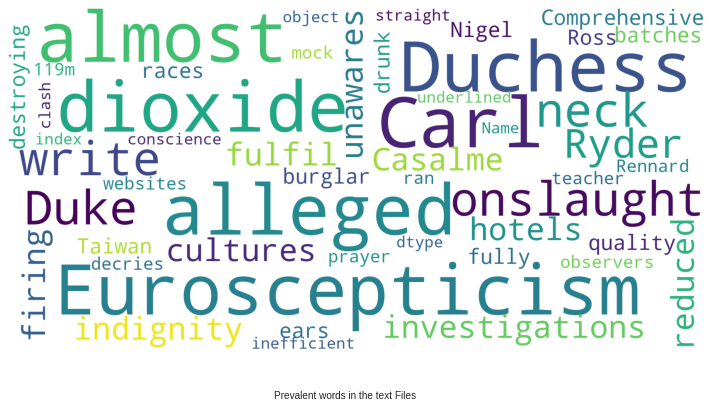

In [0]:
show_wordcloud(words_dataframe["index"].sample(50), title = 'Prevalent words in the text Files')

##### Entity Extractor Class

In [0]:
import itertools
import tabulate
from nltk import ne_chunk

import heapq
from operator import itemgetter
import networkx as nx

from sklearn.base import BaseEstimator, TransformerMixin

GOODLABELS = frozenset(['PERSON'])

class EntityExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, labels=GOODLABELS, **kwargs):
        self.labels = labels

    def get_entities(self, document):
        entities = []
        for paragraph in document:
            for sentence in paragraph:
                trees = ne_chunk(sentence)
                for tree in trees:
                    if hasattr(tree, 'label'):
                        if tree.label() in self.labels:
                            entities.append(
                                ' '.join([child[0].lower() for child in tree])
                                )
        return entities

    def fit(self, documents, labels=None):
        return self

    def transform(self, documents):
        for document in documents:
            yield self.get_entities(document)


class EntityPairs(BaseEstimator, TransformerMixin):
    def __init__(self):
        super(EntityPairs, self).__init__()

    def pairs(self, document):
        return list(itertools.permutations(set(document), 2))

    def fit(self, documents, labels=None):
        return self

    def transform(self, documents):
        return [self.pairs(document) for document in documents]

##### Graph Extractor Class

In [0]:
class GraphExtractor(BaseEstimator,TransformerMixin):
   
    def __init__(self):
        self.G = nx.Graph()
      
    def fit(self, documents, labels=None):
        return self

    def transform(self, documents):
        for document in documents:
            for first, second in document:
                if (first, second) in self.G.edges():
                    self.G.edges[(first, second)]['weight'] += 1
                else:
                    self.G.add_edge(first, second, weight=1)
        return self.G

def nbest_centrality(G, metrics, n=10):
    # Compute the centrality scores for each vertex
    nbest = {}
    for name, metric in metrics.items():
        scores = metric(G)
        # Set the score as a property on each node
        nx.set_node_attributes(G, name=name, values=scores)
        # Find the top n scores and print them along with their index
        topn = heapq.nlargest(n, scores.items(), key=itemgetter(1))
        nbest[name] = topn
    return nbest

In [0]:
# extact named entities
docs = corpus.docs()
entity_extractor = EntityExtractor()
entities = entity_extractor.fit_transform(docs)

# generate entity pairs
entity_pairing = EntityPairs()
pairs = entity_pairing.fit_transform(entities)

# create graph (node=entity, edge property (weight) from frequency of pairs)
graph = GraphExtractor()
G = graph.fit_transform(pairs)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1510
Number of edges: 13956
Average degree:  18.4848


Printing the top 15 Entities based on degree centrality score
 and Closeness centrality score

In [0]:
N_GRAPH_CENTRALITY_ITEMS=15

# calculate degree centrality
centralities = {"Degree Centrality" : nx.degree_centrality}
centrality = nbest_centrality(G, centralities, N_GRAPH_CENTRALITY_ITEMS)

# print degree centrality
for measure, scores in centrality.items():
    print("Rankings for {}:".format(measure))
    print((tabulate.tabulate(scores, headers=["Top Terms", "Score"])))
    print("")

# subgraph for charles clarke
CENTRALITY_OF = "charles clarke"
H = nx.ego_graph(G, CENTRALITY_OF)

# calculate closeness centrality
person_centralities = {"Closeness centrality" : nx.closeness_centrality}
person_centrality = nbest_centrality(H, person_centralities, N_GRAPH_CENTRALITY_ITEMS)

# print closeness centrality
for measure, scores in person_centrality.items():
    print("Rankings for {} to '{}':".format(measure, CENTRALITY_OF))
    print((tabulate.tabulate(scores, headers=["Top Terms", "Score"])))
    print("")  

Rankings for Degree Centrality:
Top Terms           Score
---------------  --------
labour           0.332008
tony blair       0.319417
blair            0.313453
michael howard   0.265739
tony             0.193506
wales            0.190855
howard           0.172962
brown            0.153082
gordon brown     0.148443
charles kennedy  0.139165
lord             0.13784
tory             0.119947
home             0.117959
lib              0.113983
charles clarke   0.10338

Rankings for Closeness centrality to 'charles clarke':
Top Terms           Score
---------------  --------
charles clarke   1
blair            0.746411
tony blair       0.732394
home             0.725581
michael howard   0.655462
lord             0.647303
clarke           0.634146
david blunkett   0.624
labour           0.621514
tory             0.616601
howard           0.614173
charles kennedy  0.611765
tony             0.6
islam            0.59542
wales            0.588679



Social Graph Visualization

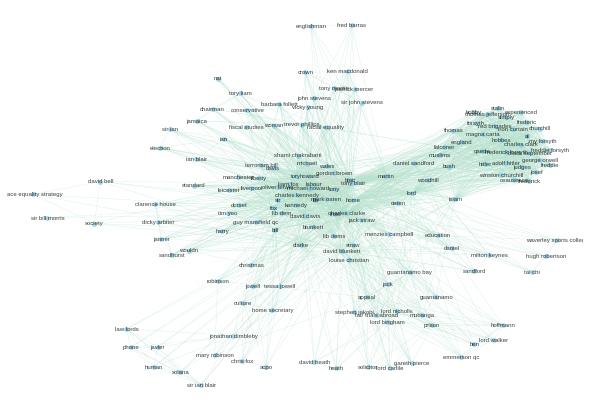

In [0]:
import matplotlib.pyplot as plt

graph_to_plot=H
edges, weights = zip(*nx.get_edge_attributes(graph_to_plot, "weight").items())
pos = nx.spring_layout(graph_to_plot, k=0.3, iterations=40)
nx.draw(
    graph_to_plot, pos, node_color="skyblue", node_size=20, edgelist=edges,
    edge_color=weights, width=0.25, edge_cmap=plt.cm.Pastel2,
    with_labels=True, font_size=6, alpha=0.8)

plt.show()

Analyzing text using Social graph algorithms provides us great insights even without prior knowledge of text. As I try to extract close terms to charles clark, i get other valuable text like 'michael howard', 'tony blair', 'david blunkett' and 'charles kennedy', which may turn important for British Politics.